# Pymaceuticals

This was a study done on 250 mice for a period of 45 days comparing the effects of 10 anti cancer treatments.  This analysis will compare only 4 of the 10 treatments (Capomulin, Infubinol, Ketapril, and Placebo) in the study. 

* On tumor growth, it was found that only those mice treated with Capomulin had a continuous decrease in growth of tumor from 45 mm3 to 36 mm3.

* On the spreading of cancer, it was found that the mice that were treated with Capomulin had the least metastatic site.  The one that metastasised the most was those mice treated with Ketapril.

* During the treatment, the mice treated with Infubinol had the lowest survival rate (36%).

* Overall, Capomulin treatment gave the most favorable outcome in the tumor growth (-13%), metastatic sites (1.5), and the survival rate (84%) 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# define data inputs
clinical_data = "Resources/clinicaltrial_data.csv"
mouse_data = "Resources/mouse_drug_data.csv"

In [3]:
# open clinical data and replace all NaN, if any
clinical_orig_pd = pd.read_csv(clinical_data)
clinical_orig_pd.fillna(0, inplace=True)
clinical_orig_pd.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# open mouse data and replace all NaN, if any
mouse_orig_pd = pd.read_csv(mouse_data)
mouse_orig_pd.fillna(0, inplace=True)
mouse_orig_pd.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
# merge mouse and clinical data
merged_pd = mouse_orig_pd.merge(clinical_orig_pd, on="Mouse ID", how="left")
merged_renamed_final = merged_pd[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug']]
#fix format 
merged_renamed_final.style.format({"Tumor Volume (mm3)": "{:,.2f}"})
merged_renamed_final.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


## Tumor Reponse to Treatment

In [6]:
# find tumor volume bu drug and timepoint
tumorVolume = merged_pd.groupby(['Drug', 'Timepoint']).aggregate({'Tumor Volume (mm3)': 'mean'})
tumorVolume 

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [7]:
timepoint_groupby = merged_pd.groupby(['Drug','Timepoint'])
# miceCount = timepoint_groupby['Mouse ID'].nunique()


In [8]:
# calculate standard error of mean
tumor_sem = timepoint_groupby['Tumor Volume (mm3)'].sem()

tumor_sem_df = pd.DataFrame({
    'tumorSEM' : tumor_sem
})

tumor_sem_df.head()

tumorSEM
Drug      Timepoint          
Capomulin 0          0.000000
          5          0.448593
          10         0.702684
          15         0.838617
          20         0.909731

In [9]:
tumor_unstack_df = tumorVolume.unstack(0)
tumor_unstack_df

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [10]:
x_axis = tumor_unstack_df.index

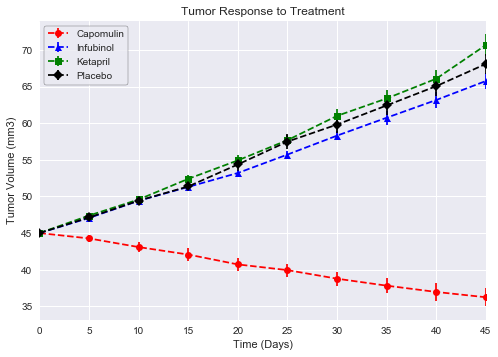

In [11]:
# make a list of medicines to be analyzed
totalMiceEachDrug = 25
medicines = ['Capomulin','Infubinol','Ketapril','Placebo']
markers = ['o','^','s','D']
colors = ['red', 'blue','green','black']


for x in medicines:
#   get location in list
    y = medicines.index(x)
    plt.errorbar(x_axis, tumor_unstack_df['Tumor Volume (mm3)'][x], yerr=tumor_sem[x], marker=markers[y], color=colors[y], linestyle='--', label=x)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(tumor_unstack_df.index[0], tumor_unstack_df.index[-1])
plt.legend(frameon=True, edgecolor="black", loc="upper left")
plt.show()

## Metastic Response to Treatment

In [12]:
# find metastic site by drug and timepoint
metastaticSites = merged_pd.groupby(['Drug', 'Timepoint']).aggregate({'Metastatic Sites': 'mean'})
metastaticSites

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [13]:
# calculate standard error of mean
metastatic_sem = timepoint_groupby['Metastatic Sites'].sem()

metastatic_sem_df = pd.DataFrame({
    'siteSEM' : metastatic_sem
})
metastatic_sem_df.head()

siteSEM
Drug      Timepoint          
Capomulin 0          0.000000
          5          0.074833
          10         0.125433
          15         0.132048
          20         0.161621

In [14]:
# pivot a level of column
metastatic_unstack_df = metastaticSites.unstack(0)
metastatic_unstack_df

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

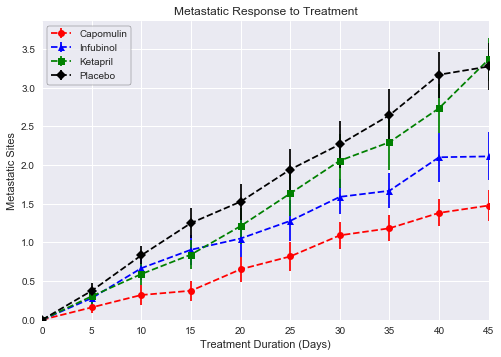

In [15]:
yMin = 0
yMax = metastatic_unstack_df.max().max()
# plot the metastatic sites of tumor
for x in medicines:
#   get location in list
    y = medicines.index(x)
    
    plt.errorbar(x_axis, metastatic_unstack_df['Metastatic Sites'][x], yerr=metastatic_sem[x], marker=markers[y],color=colors[y],linestyle='--', label=x)

plt.title('Metastatic Response to Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.ylim(metastatic_unstack_df.min().min(), metastatic_unstack_df.max().max()+.5)
plt.xlim(metastatic_unstack_df.index[0], metastatic_unstack_df.index[-1])
plt.legend(frameon=True, edgecolor="black", loc="upper left")

plt.show()

## Survival Rates

In [16]:
# find mouse count by drug and timepoint and calculate survival rate
mouseCount = merged_pd.groupby(['Drug', 'Timepoint']).aggregate({'Mouse ID': 'nunique'})
mouseCount_pd = pd.DataFrame(mouseCount)
mouseCount_pd['Total Mice In Study'] = totalMiceEachDrug
mouseCount_pd['Survival Rate'] = 100 * (mouseCount_pd['Mouse ID'] / mouseCount_pd['Total Mice In Study'])
    
mouseRate_pd = mouseCount_pd.loc[medicines]['Survival Rate']
mouseRate_df = pd.DataFrame(mouseRate_pd)

In [17]:
# pivot a level of column
mouse_unstack_df = mouseRate_df.unstack(0)
mouse_unstack_df

Survival Rate                           
Drug          Capomulin Infubinol Ketapril Placebo
Timepoint                                         
0                 100.0     100.0    100.0   100.0
5                 100.0     100.0     92.0    96.0
10                100.0      84.0     88.0    96.0
15                 96.0      84.0     76.0    80.0
20                 92.0      80.0     76.0    76.0
25                 88.0      72.0     76.0    68.0
30                 88.0      68.0     72.0    60.0
35                 88.0      48.0     68.0    56.0
40                 84.0      40.0     60.0    48.0
45                 84.0      36.0     44.0    44.0

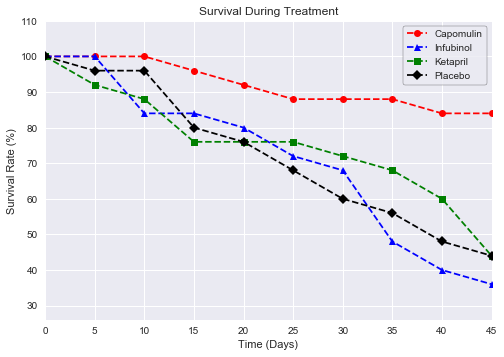

In [18]:
# plot the metastatic sites of tumor
x_axis = mouse_unstack_df.index
for x in medicines:
#   get location in list
    y = medicines.index(x)
    plt.plot(x_axis, mouse_unstack_df['Survival Rate'][x], marker=markers[y],color=colors[y], linestyle='--', label=x)

plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.xlim(mouse_unstack_df.index[0], mouse_unstack_df.index[-1])
plt.ylim(mouse_unstack_df.min().min()-10, mouse_unstack_df.max().max()+10)
plt.legend(frameon=True, edgecolor="black", loc="upper right")

plt.show()

## Summary Bar Graph

In [19]:
# create a dataframe
summarylist = []
positive = []

for x in medicines:
    # get location in list
    y = medicines.index(x)
    # find first and last entry of tumor volume and calculate percent change
    first = tumor_unstack_df['Tumor Volume (mm3)'][x][tumor_unstack_df['Tumor Volume (mm3)'].index[0]]
    last = tumor_unstack_df['Tumor Volume (mm3)'][x][tumor_unstack_df['Tumor Volume (mm3)'].index[-1]]
    percent = 100 * (last - first)/ first
    summarylist.append(percent)
    # find out color of bar
    if (percent > 0):
        positive.append("r")
    else:
        positive.append("g")
    

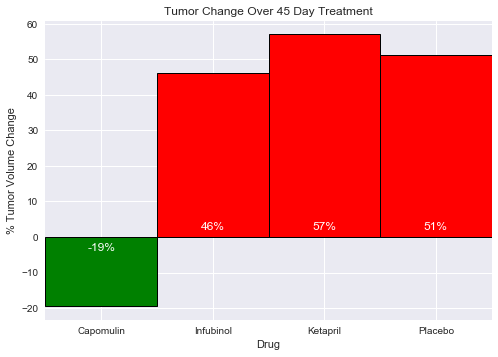

In [20]:
# fig, ax = plt.subplots()

fig = plt.figure()
ax = fig.add_subplot(111)

x_axis = np.arange(0, len(summarylist))   
rects = ax.bar(x_axis, summarylist, width=1, color=positive, edgecolor="black", linewidth=1, align="center")

for sl, p in zip(summarylist, positive):
    y = summarylist.index(sl)
    if (sl > 0):
        labely = 3
    else:
        labely = -3
    ax.text(rects[y].get_x() + rects[y].get_width()/2., labely,
                "%.0f%%" % float(sl),
                ha='center', va='center', color="white", fontsize=12)

ax.set_xticks(x_axis)
ax.set_xlabel("Drug")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xticklabels(medicines, rotation=0)
ax.set_xlim(-0.5, len(x_axis)-0.5)
ax.set_title("Tumor Change Over 45 Day Treatment")


plt.show()
